In [192]:
import numpy as np
import random


# Banditas defined Kemosabe!

In [193]:
class SLotMachine:
    def __init__(self,probability):
        self.probability=probability;
        self.val=[];
        for i in range(0,100):
            self.val.append(0);
        win=random.sample(range(100), int(self.probability*100))
        for i in win:
            self.val[i]=1;
    def pullHandle(self):
        s=random.randrange(0, 100, 1)
        return self.val[s];

# Experiment setup

Experiment 1

In [194]:
def testbed(n):
    banditas=[]
    for i in range(n):
        p=random.random();
        banditas.append(SLotMachine(p));
    return banditas;
        

In [195]:
def printBanditProbability(banditas):
    j=0;
    for i in banditas:
        print(j," p =",i.probability);
        j=j+1;
    print("total Bandits :",len(banditas))

In [196]:
def getQvals(banditas,rS,aS):
    n=len(banditas);
    qVal=[0]*n
    
    for i in range(n):
        if aS[i]==0.0:
            qVal[i]=0.0;
        else :
            qVal[i]=rS[i]/aS[i];
        
    return qVal;
    

In [197]:
def getError(banditas,pvals):
    n=len(banditas);
    
    sumP=0.0;
    for i in range(n):
        sumP=sumP+(abs(banditas[i].probability-pvals[i]));
    avGerr=sumP/n;
    return avGerr;
    
    

# Random Select Algorithm 

In [198]:
def randSelect(banditas,trials):
    n=len(banditas);
    rS=[0.0]*n;
    aS=[0.0]*n;
    bS=[];
    for i in range(n):
        bS.append(i);
    err=[]
    for i in range(trials):
        sA=random.choice(bS);
        r=banditas[sA].pullHandle();
        rS[sA]=rS[sA]+r;
        aS[sA]=aS[sA]+1;
        qvals=getQvals(banditas,rS,aS)
        err.append(getError(banditas,qvals))
    #qvals=getQvals(banditas,rS,aS);
    #return qvals;
    return (rS,aS,err);

# greedy Select Algo

In [199]:
def GreedySelect(banditas,rS1,aS1,runs):
    n=len(banditas);
    rS=rS1;
    aS=aS1;
    qValAvg=[0]*runs;
    qval1=[0]*n;
    err=[]
    for i in range(runs):
        qvals=getQvals(banditas,rS,aS);
        maxqVal=qvals.index(max(qvals));
        r=banditas[maxqVal].pullHandle();
        rS[maxqVal]=rS[maxqVal]+r;
        aS[maxqVal]=aS[maxqVal]+1;
        qvals=getQvals(banditas,rS,aS);
        err.append(getError(banditas,qvals));
        qSum=0;
        qAvg=0
        for j in range(n):
            qSum=qSum+qvals[j];
        qValAvg[i]=qSum/n;
        qval1=qvals;
    return (qValAvg,qval1,err,rS,aS); 

# Plots

In [200]:
import matplotlib.pyplot as plt


def GraphPlot(banditas,qValAvg,exp,runs):
    x_ax=range(0,runs);
    plt.plot(x_ax,qValAvg) 
  
    plt.xlabel('steps') 
    plt.ylabel('average Reward') 
    plt.title('steps vs average Reward for :'+exp) 
    plt.show()
    

In [201]:
def GraphPlotError(err,runs):
    x_ax=range(0,runs);
    plt.plot(x_ax,err) 
  
    plt.xlabel('steps') 
    plt.ylabel('Avg error ') 
    plt.title('error vs runs') 
    plt.show()

# Experiment Runs

In [202]:
banditas=testbed(10)
printBanditProbability(banditas)

0  p = 0.6180582278350676
1  p = 0.9219300281404429
2  p = 0.3161409369703301
3  p = 0.8143239892027936
4  p = 0.4116166263602493
5  p = 0.3806646576902516
6  p = 0.2280711818608161
7  p = 0.12739506362856945
8  p = 0.9087480481859231
9  p = 0.8866727606679978
total Bandits : 10


random Select trials + totally greedy

p value obtained after trials 
0 0.581151832460733
1 0.912621359223301
2 0.29949238578680204
3 0.8435754189944135
4 0.41237113402061853
5 0.35323383084577115
6 0.19
7 0.14883720930232558
8 0.8883495145631068
9 0.8246445497630331


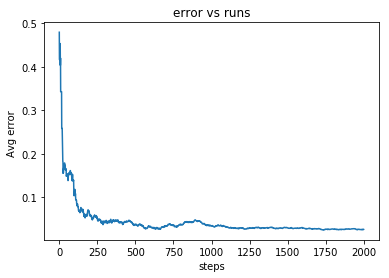

p value obtained after greedy runs 
0 0.581151832460733
1 0.9189692337840486
2 0.29949238578680204
3 0.8435754189944135
4 0.41237113402061853
5 0.35323383084577115
6 0.19
7 0.14883720930232558
8 0.8883495145631068
9 0.8246445497630331


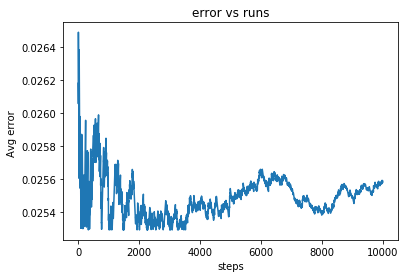

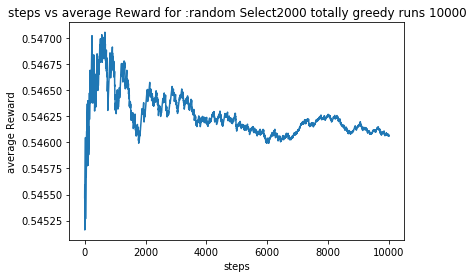

In [206]:
trials=2000
runs=10000
res=randSelect(banditas,trials);
qvals=getQvals(banditas,res[0],res[1]);
j=0
print("p value obtained after trials ")
for i in qvals:
    print(j,i);
    j=j+1;

GraphPlotError(res[2],trials)
qavg=GreedySelect(banditas,res[0],res[1],runs)
qavg1=getQvals(banditas,qavg[3],qavg[4]);
j=0
print("p value obtained after greedy runs ")
for i in qavg1:
    print(j,i);
    j=j+1;
GraphPlotError(qavg[2],runs)

exp="random Select"+str(trials) + " totally greedy runs "+str(runs);
GraphPlot(banditas,qavg[0],exp,runs);